## 1. 数据处理和分析

### 1.1 数据预处理

读取从 [UN Comtrade Database](https://comtrade.un.org/data/) 获取的 2016-2020 年全球铜及其精炼物（2603）贸易记录，并处理：

1. 去除贸易对象为 World 的数据行
2. 并保留关心的数据列：报告者及其代码、贸易对象及代码、贸易类型、贸易额

**！注**：数据中上报者（Reporter）可能包含国家和地区以及**中国**港澳台地区，为方便起见以下统称“国家”.

In [1]:
from src.main import Report, pd, show_cluster_list, plt


In [2]:
report_11 = Report(
    'src/data/format-2011-world-copper-2063-trade.json', '2011', 2)
report_12 = Report(
    'src/data/format-2012-world-copper-2063-trade.json', '2012', 2)
report_13 = Report(
    'src/data/format-2013-world-copper-2063-trade.json', '2013', 2)
report_14 = Report(
    'src/data/format-2014-world-copper-2063-trade.json', '2014', 2)
report_15 = Report(
    'src/data/format-2015-world-copper-2063-trade.json', '2015', 2)
report_16 = Report(
    'src/data/format-2016-world-copper-2063-trade.json', '2016', 2)
report_17 = Report(
    'src/data/format-2017-world-copper-2063-trade.json', '2017', 2)
report_18 = Report(
    'src/data/format-2018-world-copper-2063-trade.json', '2018', 2)
report_19 = Report(
    'src/data/format-2019-world-copper-2063-trade.json', '2019', 2)
report_20 = Report(
    'src/data/format-2020-world-copper-2063-trade.json', '2020', 2)


In [3]:
reports = [report_11, report_12, report_13, report_14, report_15,
           report_16, report_17, report_18, report_19, report_20]


2.687770095073466
2.6622155752590535
2.6017726798748697
2.655799440499247
2.1606700065786146
2.5508719106762014
2.686367870820826
2.6350073544862367
2.5158607579897825
2.6442132639791938


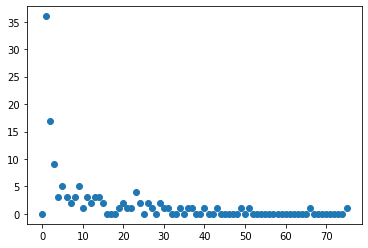

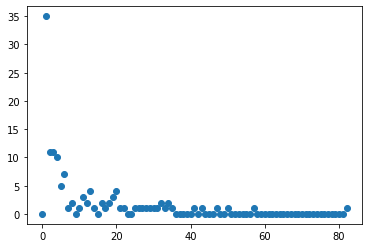

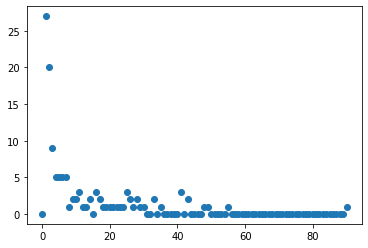

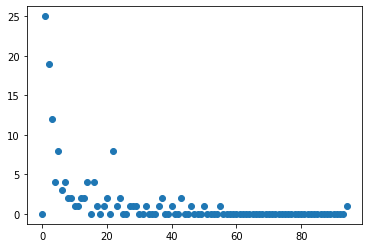

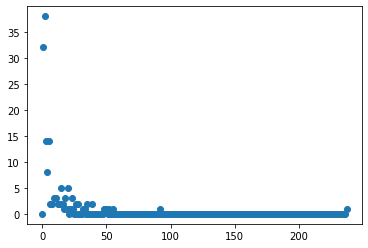

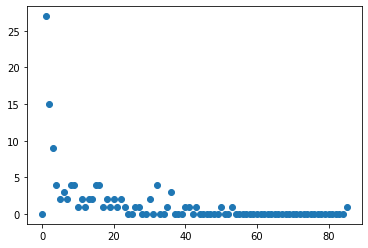

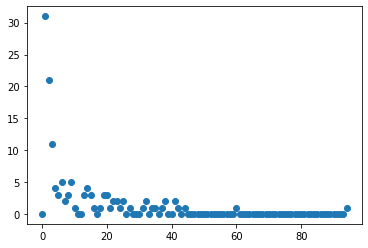

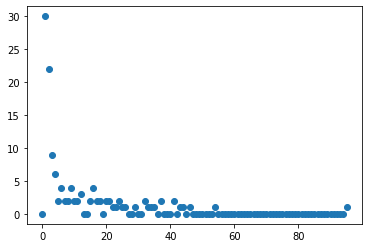

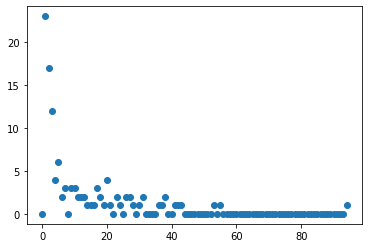

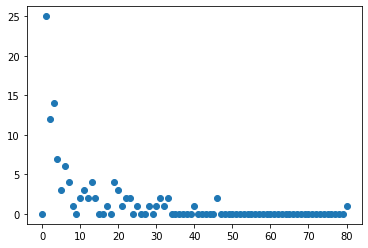

In [17]:
import networkx as nx
for report in reports:
    frequency = nx.degree_histogram(report.G)
    spl = nx.shortest_path_length(report.G)
    Ls = 0
    ps = 0
    for u, v in spl:
        ls = [l for _, l in v.items()]
        ps += len(ls)
        Ls += sum(ls)
    print(Ls/ps)
    fig, axes = plt.subplots()
    x = list(range(0, len(frequency)))
    axes.scatter(x, frequency)


### 1.2 数据分析与检验*

以 2019 年数据为例，进行数据分析与检验

1. 获取贸易参与者

In [24]:
report_19.check_data()


上报进贸易记录的国家总数（不含重复）:  85
上报进贸易记录的中的贸易对象国家总数（不含重复）:  104
上报进贸易记录的国家，和记录中的贸易对象国家总数（不含重复）:  114


2. 数据检验

从上面数据可以看出，各国上报的记录显然是有出入的，即上报记录中涉及的国家数要比上报数据的国家数多，这至少说明了一些参与了贸易的国家没有上报贸易记录

下面以中国上报的记录为例检查和说明：

        1. 查看中国上报的进口记录

In [25]:
report_19.view_logs_by_china()


中国上报的进口记录中，涉及出口国家的个数:  93


,Reporter Code,Reporter,Partner Code,Partner,Trade Flow,Trade Value (US$),Trade Quantity,NetWeight
0,156,China,784,United Arab Emirates,Import,70360785,53964805,53964805.0
1,156,China,792,Turkey,Import,60658162,59904304,59904304.0
2,156,China,826,United Kingdom,Import,74307,60000,60000.0
3,156,China,834,United Rep. of Tanzania,Import,8523190,2182580,2182580.0
4,156,China,842,USA,Import,13566717,9074822,9074822.0
...,...,...,...,...,...,...,...,...
88,724,Spain,156,China,Export,746141115,633941004,633941004.0
89,792,Turkey,156,China,Export,76043743,86924900,86924900.0
90,842,USA,156,China,Export,4248920,7546469,7546469.0
91,704,Viet Nam,156,China,Export,71467,59429,59429.0


        2. 查看中国进口对象上报的对中国的出口记录

In [26]:
report_19.view_logs_about_china()


全球上报了对中国有出口记录的国家 31


,Reporter Code,Reporter,Partner Code,Partner,Trade Flow,Trade Value (US$),Trade Quantity,NetWeight
0,56,Belgium,156,China,Import,10336,2149,2149.0
1,96,Brunei Darussalam,156,China,Import,16143,100000,100000.0
2,100,Bulgaria,156,China,Import,1850,74,74.0
3,116,Cambodia,156,China,Import,576278,1155237,1155237.0
4,124,Canada,156,China,Import,161,36,36.0
5,152,Chile,156,China,Import,10647,341,341.0
6,344,"China, Hong Kong SAR",156,China,Import,124228,334780,334780.0
7,180,Dem. Rep. of the Congo,156,China,Import,539,5,5.0
8,222,El Salvador,156,China,Import,43,3,3.0
9,251,France,156,China,Import,6,1,1.0


对比上面两个表格，显然各国出入口数据是**普遍**有出入的：

首先，进出口对象数量上就不一致：中国上报记录中显示，中国 2019 年共从 56 个国家进口铜资源；而只有 43 个国家上报了对中国出口铜资源的记录

其次，对于有些进出口双方都上报了记录的情况，双方上报的贸易金额不一致，有的甚至出入较大

这可能是有以下的原因导致的：

1. 由于政策和统计方法不同导致的上报数据的结果不同. 
2. 由于货物在进出口过程中经第三方国家中转，而进出口国家对于出入口的目标国家登记不一致导致.
3. 其他可能原因.

## 2. 构建网络

根据以上数据和分析，构建有向加权网络是合适的，具体如下：

1. 以国家为节点，进出口关系为指向（出口国 -> 进口国），贸易金额为权重，构建有向加权图

2. 对于进出口关系，忽略各个国家之间上报数据的差异，即只要在任何一条记录中出现进出口关系即双方存在贸易关系，则为对应节点添加连边

3. 对于贸易金额，若两方上报金额不一致则取两者均值
  

绘制网络（以 2020 年为例）：

In [27]:
# report_20.net.draw()


## 3. 基于连接信息熵的节点重要性

### 3.1 定义

#### 3.1.1 连接度 $A_i$
定义有向加权网络中节点的连接度为
$$
A_i = \theta\sum_{j\in \Gamma_{i\_in}}k_j + (1-\theta)\sum_{j\in \Gamma_{i\_out}}k_j
$$

其中 $\Gamma_{i\_in}$ 是指向节点 $i$ 的邻居节点集，$\Gamma_{i\_out}$ 是由节点 $i$ 指向的邻居节点集；$k_j$ 是对应节点的度；$\theta \in [0,1]$ 是参数.

具体地，有向加权网络中，定义节点 $k_j$ 的度为：

$$
\begin{aligned}
k_j &= \lambda k_i^{in} + (1-\lambda)k_i^{out} \\
    &= \lambda \sum_{i=1}^m w_{ij} + (1 - \lambda)\sum_{i=1}^m w_{ji}
\end{aligned}
$$

其中 $w_{uv}$ 表示由节点 $u$ 指向节点 $v$ 的边的权重，若该边不存在则记为 $0$；$\lambda$ 为出入边的权重参数.

具体地上式表示，在节点 $j$ 与其邻居节点的连边中，按权重求出入连边的加重和.

#### 3.1.2 连边概率 $P_{i_j}$

定义连边概率 $P_{i_j}$ 为节点 $i$ 被其邻居节点 $j$ 选择进行连边的概率：
$$
P_{i_j} = \frac{k_i}{A_j}, \ \ \ \ (j\in\Gamma_i)
$$

#### 3.1.3 连接信息熵 $E_i$

定义有向网络中连接信息熵如下：

$$
E_i = \sum\limits_{j\in\Gamma_j}\left| P_{i_j}\log_2 P_{i_j} \right|
$$

*这里取绝对值是因为 $\theta$ 加权的原因，$P_{i_j}$ 可能大于 $1$*

## 4. 实验和结果

### 4.1 求各节点的连接信息熵
根据第 3 节给出的定义，求各节点的连接信息熵，并将前 20 的连接信息熵绘图如下：

*实验中取 $\theta, \lambda = 0.7$.*

In [28]:
'''
for report in reports:
    print(report.name + '年连接信息熵分布')
    report.net.drawEntropiesBar()
'''


"\nfor report in reports:\n    print(report.name + '年连接信息熵分布')\n    report.net.drawEntropiesBar()\n"

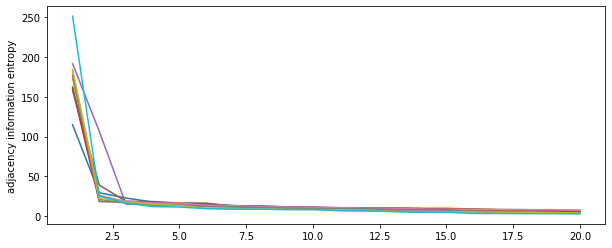

In [29]:
plt.figure(figsize=(10, 4))
report_11.draw_entropy_plot(20)
report_12.draw_entropy_plot(20)
report_13.draw_entropy_plot(20)
report_14.draw_entropy_plot(20)
report_15.draw_entropy_plot(20)

report_16.draw_entropy_plot(20)
report_17.draw_entropy_plot(20)
report_18.draw_entropy_plot(20)
report_19.draw_entropy_plot(20)
report_20.draw_entropy_plot(20)
plt.show()


从上表可以看出，中国、欧盟等铜贸易大国位列前茅，且前二十名均为贸易和工业水平发达的国家，说明使用“连接信息熵”来衡量铜贸易网络节点的重要性具备一定的合理性.

### 4.2 层次聚类
对个节点的信息熵进行层次聚类，选择聚类数为 6；并为每个节点设置聚类标签，按熵值从大到小标记为 1 - 6

### 4.3 选取属性并进行离散化划分

选取以下属性，并选择聚类层数：

* IS：入强度, 6 层，反应进口贸易总额
* OS: 出强度，6 层，反应出口贸易总额
* DC: 度中心性，6 层，反应贸易伙伴的数量
* BC: 中介中心性，6 层，反应在贸易网络中的枢纽性质（不考虑权重）
* CC: 接近中心性，6 层，反应与其他贸易者之间的平均距离（不考虑权重）

属性值由大到小标记为 1-6

In [30]:
cluster_list = show_cluster_list(reports, label_name="E")


In [31]:
cluster_list


,code,code,code,code,code,code,code,code,code,code
E,,,,,,,,,,
1,156,156,156,156,156,156,156,156,156,156
2,410,710,410,"100,724",528,528,100,"410,100",724,724
3,710,"276,100,604,410","699,484,276,100","276,398,410,152,604,842,246,608","100,152,276,842,410,604,724","724,410,124,100","724,152,784","152,724,604,757",152,124
4,"56,90,276,604","752,724,246,842,等14项","124,152,604,724,842,792,752,36","702,704,579,191,392,36,699,124",268,"604,152,36,710,等12项","604,410,246,699,等16项","710,398,616,392,528,842,376,276","100,604","410,458"
5,"842,100,608,894,等17项","344,484,124,608,76,784,894","417,392,710,894,76,608,826","710,894,76,887,484","36,124,398,699,等10项","246,76","76,608,710,704,484","76,36,699,124,等11项","410,757,56,842,等15项","842,860,392,528,等10项"
6,"643,752,516,826,等100项","643,516,757,398,等99项","528,616,246,251,等101项","56,643,757,752,等98项","608,710,616,484,等146项","484,608,894,360,等94项","894,643,458,616,等101项","360,702,643,458,等97项","381,528,484,246,等94项","246,699,484,100,等95项"


In [32]:
writer = pd.ExcelWriter('cluster_list.xlsx')
cluster_list.to_excel(writer, float_format='%.5f')
writer.save()


In [33]:
report_19.show_nodes_attribute()


,code,name,IS,OS,DC,BC,CC,E
0,156,China,1,6,1,1,1,1
1,724,Spain,4,5,3,4,2,2
2,152,Chile,6,2,2,3,2,3
3,100,Bulgaria,4,6,4,5,3,4
4,604,Peru,6,1,3,5,4,4
...,...,...,...,...,...,...,...,...
109,591,Panama,6,6,6,6,6,6
110,598,Papua New Guinea,6,6,6,6,6,6
111,620,Portugal,6,6,5,6,4,6
112,31,Azerbaijan,6,6,6,6,4,6


上表以 2019 年数据，展示了各个节点的 5 个条件属性及 1 个决策属性所在的层次序号（1-6）

### 4.5 生成决策树

使用 ID3 算法生成决策树

In [34]:
for report in reports:
    report.decision_tree
    report.show_dt_accuracy()
    report.save_decision_tree('outputs/decision_tree_' + report.name + '.json')


{'IS': {'layer': 6, 'cluster': [[7432321740.0], [6167522109.0], [5551467928.0], [2514969442.0], [1042580010.0, 931749218.0, 915045194.0, 910360336.0], [484014708.0, 312106827.0, 304406965.0, 260477815.0, 228769401.0, 196037656.0, 188246330.0, 182687057.0, 124618387.0, 105071824.0, 58522017.0, 58378179.0, 57389046.0, 46110565.0, 44702830.0, 41850608.0, 38570198.0, 29167362.0, 16747909.0, 13742728.0, 10806845.0, 10650500.0, 10359644.0, 9069314.0, 7251826.0, 6100002.0, 3111139.0, 3076673.0, 3062904.0, 2702001.0, 2511547.0, 2370896.0, 728920.0, 583481.0, 419615.0, 419593.0, 348663, 301161.0, 272260.0, 239118.0, 205957.0, 198748.0, 96097.0, 95542.0, 90400.0, 88669.0, 79206.0, 69438.0, 54103.0, 43126.0, 37155.0, 29754.0, 28766.0, 27982.0, 26389.0, 25020, 15922.0, 14991.0, 13373.0, 11000.0, 8873.0, 7428.0, 3010.0, 2789.0, 2140.0, 1884.0, 1200.0, 1051.0, 1001.0, 928.0, 757.0, 729, 588.0, 558, 496.0, 425.0, 370.0, 350.0, 320.0, 181.0, 120.0, 90.0, 56.0, 38.0, 34.0, 33.0, 20.0, 17.0, 15.0, 11.0,

决策树（2019）：

![decistion_tree](outputs/decision_tree.png)

根据决策树生成决策表：

In [35]:
for report in reports:
    report.set_attribute_probability()
    report.decision_list


{'IS': {'layer': 6, 'cluster': [[7432321740.0], [6167522109.0], [5551467928.0], [2514969442.0], [1042580010.0, 931749218.0, 915045194.0, 910360336.0], [484014708.0, 312106827.0, 304406965.0, 260477815.0, 228769401.0, 196037656.0, 188246330.0, 182687057.0, 124618387.0, 105071824.0, 58522017.0, 58378179.0, 57389046.0, 46110565.0, 44702830.0, 41850608.0, 38570198.0, 29167362.0, 16747909.0, 13742728.0, 10806845.0, 10650500.0, 10359644.0, 9069314.0, 7251826.0, 6100002.0, 3111139.0, 3076673.0, 3062904.0, 2702001.0, 2511547.0, 2370896.0, 728920.0, 583481.0, 419615.0, 419593.0, 348663, 301161.0, 272260.0, 239118.0, 205957.0, 198748.0, 96097.0, 95542.0, 90400.0, 88669.0, 79206.0, 69438.0, 54103.0, 43126.0, 37155.0, 29754.0, 28766.0, 27982.0, 26389.0, 25020, 15922.0, 14991.0, 13373.0, 11000.0, 8873.0, 7428.0, 3010.0, 2789.0, 2140.0, 1884.0, 1200.0, 1051.0, 1001.0, 928.0, 757.0, 729, 588.0, 558, 496.0, 425.0, 370.0, 350.0, 320.0, 181.0, 120.0, 90.0, 56.0, 38.0, 34.0, 33.0, 20.0, 17.0, 15.0, 11.0,

In [36]:
pd.DataFrame(report_19.decision_list)[
    report_19.attribute_names + ['label']].sort_values('label')


{'IS': {'layer': 6, 'cluster': [[19119773815], [3538318614], [1534672500], [1161838227, 1034233018], [731263220, 665027485], [450597508, 434710578, 354453842, 338990526, 323785886, 276996265, 249805782, 241323412, 210146190, 205955369, 193987600, 182427694, 159766680, 144560690, 141903894, 80819604, 67328863, 56872170, 28229333, 28191639, 27913313, 20604232, 11647310, 10401924, 7656959, 6776216, 6033452, 5650560, 3438679, 2744109, 2575933, 2273610, 2114024, 1947714, 1239051, 590914, 426406, 369499, 289634, 275105, 180000, 126944, 121531, 105335, 100000, 92922, 73628, 58249, 54393, 41749, 34676, 32933, 22001, 20000, 18059, 10769, 10000, 10000, 3648, 3375, 2462, 2183, 2083, 2000, 1358, 1194, 1000, 962, 855, 682, 400, 108, 81, 50, 20, 13, 10, 8, 8, 5, 5, 4, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'p': [0.008771929824561403, 0.008771929824561403, 0.008771929824561403, 0.017543859649122806, 0.017543859649122806, 0.9385964912280702]}, 'OS': {'layer': 6, '

,IS,OS,DC,BC,CC,label
0,NaN,NaN,1,NaN,NaN,1
15,5.0,5.0,3,NaN,NaN,2
14,4.0,5.0,3,NaN,NaN,2
13,3.0,5.0,3,NaN,NaN,2
12,2.0,5.0,3,NaN,NaN,2
...,...,...,...,...,...,...
44,NaN,NaN,5,NaN,1.0,6
46,NaN,1.0,5,NaN,3.0,6
48,NaN,3.0,5,NaN,3.0,6
40,6.0,6.0,4,3.0,NaN,6


上表展示了决策树中的 86 条决策规则中各条件属性和决策属性的取值，NaN 表示该条件属性无需判断.

例如若某一结点 DC 属性值为 1，则无需判断其余属性即可得到该节点的决策属分区为 1 的决策结论. 事实上，仅有中国的 DC 为 1，且仅有中国决策属性为 1，所以继续判断其余属性时多余的.

### 4.6 层次风险模型

1. 条件属性的概率分布

$$
p_{jA_i} = \frac{\#jA_i}{N}
$$

其中 $A_i$ 表示条件属性，$jA_i$ 表示条件属性 $A_i$ 的属性取值. $\#jA_i$ 表示属性 $A_i$ 取 $j$ 时的样本数，$N$ 表示总样本数。


下面计算各个条件属性的概率分布：

In [37]:
for report in reports:
    report.set_attribute_probability()


{'IS': {'layer': 6, 'cluster': [[7432321740.0], [6167522109.0], [5551467928.0], [2514969442.0], [1042580010.0, 931749218.0, 915045194.0, 910360336.0], [484014708.0, 312106827.0, 304406965.0, 260477815.0, 228769401.0, 196037656.0, 188246330.0, 182687057.0, 124618387.0, 105071824.0, 58522017.0, 58378179.0, 57389046.0, 46110565.0, 44702830.0, 41850608.0, 38570198.0, 29167362.0, 16747909.0, 13742728.0, 10806845.0, 10650500.0, 10359644.0, 9069314.0, 7251826.0, 6100002.0, 3111139.0, 3076673.0, 3062904.0, 2702001.0, 2511547.0, 2370896.0, 728920.0, 583481.0, 419615.0, 419593.0, 348663, 301161.0, 272260.0, 239118.0, 205957.0, 198748.0, 96097.0, 95542.0, 90400.0, 88669.0, 79206.0, 69438.0, 54103.0, 43126.0, 37155.0, 29754.0, 28766.0, 27982.0, 26389.0, 25020, 15922.0, 14991.0, 13373.0, 11000.0, 8873.0, 7428.0, 3010.0, 2789.0, 2140.0, 1884.0, 1200.0, 1051.0, 1001.0, 928.0, 757.0, 729, 588.0, 558, 496.0, 425.0, 370.0, 350.0, 320.0, 181.0, 120.0, 90.0, 56.0, 38.0, 34.0, 33.0, 20.0, 17.0, 15.0, 11.0,

2. 决策规则的概率分布

$$
    P_{\text{Rule}l} = p_{jA_i}\cdots p_{jA_p}
$$

其中，$p_{jA_k}$ 表示在决策规则 $l$ 中对应的各条件属性 $A_k$ 的取值为 $j$ 的概率.

*这里将各条件属性的分布近似看做为相互独立，即某条件属性的取值不受其他条件属性取值的影响*

下面计算各个决策规则的概率分布：

下面绘制决策规则的概率分布柱状图：

{'IS': {'layer': 6, 'cluster': [[7432321740.0], [6167522109.0], [5551467928.0], [2514969442.0], [1042580010.0, 931749218.0, 915045194.0, 910360336.0], [484014708.0, 312106827.0, 304406965.0, 260477815.0, 228769401.0, 196037656.0, 188246330.0, 182687057.0, 124618387.0, 105071824.0, 58522017.0, 58378179.0, 57389046.0, 46110565.0, 44702830.0, 41850608.0, 38570198.0, 29167362.0, 16747909.0, 13742728.0, 10806845.0, 10650500.0, 10359644.0, 9069314.0, 7251826.0, 6100002.0, 3111139.0, 3076673.0, 3062904.0, 2702001.0, 2511547.0, 2370896.0, 728920.0, 583481.0, 419615.0, 419593.0, 348663, 301161.0, 272260.0, 239118.0, 205957.0, 198748.0, 96097.0, 95542.0, 90400.0, 88669.0, 79206.0, 69438.0, 54103.0, 43126.0, 37155.0, 29754.0, 28766.0, 27982.0, 26389.0, 25020, 15922.0, 14991.0, 13373.0, 11000.0, 8873.0, 7428.0, 3010.0, 2789.0, 2140.0, 1884.0, 1200.0, 1051.0, 1001.0, 928.0, 757.0, 729, 588.0, 558, 496.0, 425.0, 370.0, 350.0, 320.0, 181.0, 120.0, 90.0, 56.0, 38.0, 34.0, 33.0, 20.0, 17.0, 15.0, 11.0,

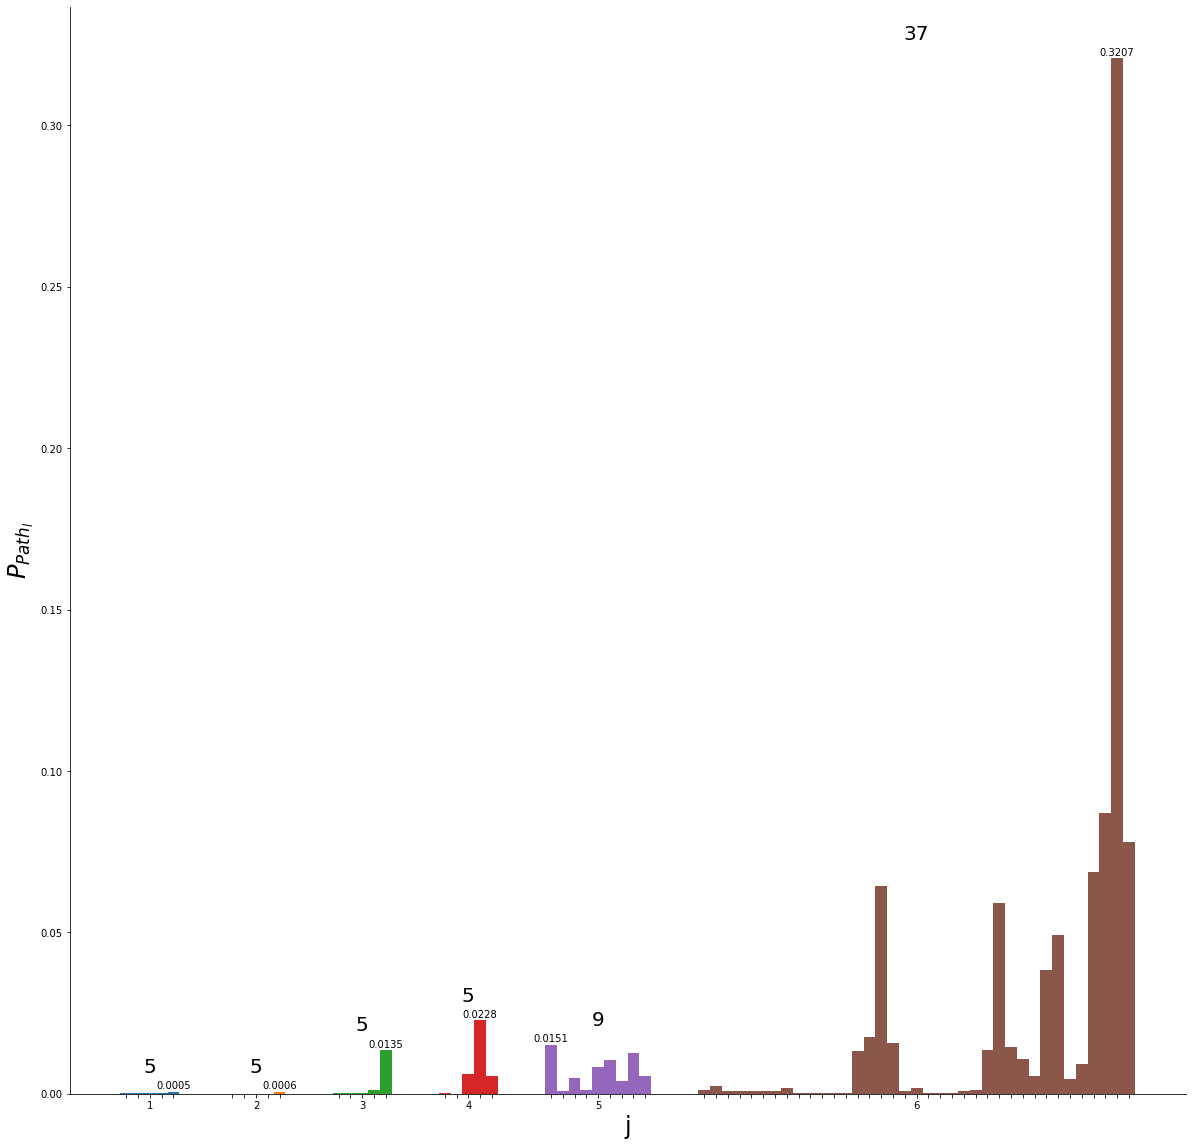

{'IS': {'layer': 6, 'cluster': [[7006645731.0], [2196824034.0], [1338053891.0, 1296410841.0], [1067361468.0, 1063426432.0, 986815215.0], [334054858.0, 329678657.0, 307317166.0, 299176358.0, 274909314.0, 258580989.0], [195059992.0, 168995404.0, 131090315.0, 103931705.0, 77358651.20365256, 56057303.0, 49706532.0, 40795560.0, 29552817.0, 26847645.0, 24077718.0, 21051968.0, 19109400.0, 12456931.0, 11753301.0, 9141105.0, 8787252.0, 8412472.0, 5326190.076716967, 4277421.0, 2712247.0, 1597365.0, 1438046.0, 1075073.0, 1000000.0, 749912.0729416688, 489682.0, 462813.0, 397999.0, 395720.0, 388395.0, 383300.0, 188054.0, 150001.0, 126483.0, 125000.0, 106172.0, 100000.0, 98255.0, 83957.0, 66000.0, 60009.0, 59059.0, 50010.0, 44000.0, 40024.0, 23968.0, 21397.0, 20027.0, 16781.0, 13526.0, 4572.0, 3169.0, 2071.0, 1842.0, 1371.0, 1307.0, 1243.0, 1053.0, 505.0, 450.0, 440, 400.0, 375.0, 330.0, 203.0, 187.0, 163.0, 160.0, 150.0, 127.0, 119.0, 110.0, 102.0, 100.0, 89.82635919420204, 50.0, 40.0, 25.0, 19.0, 

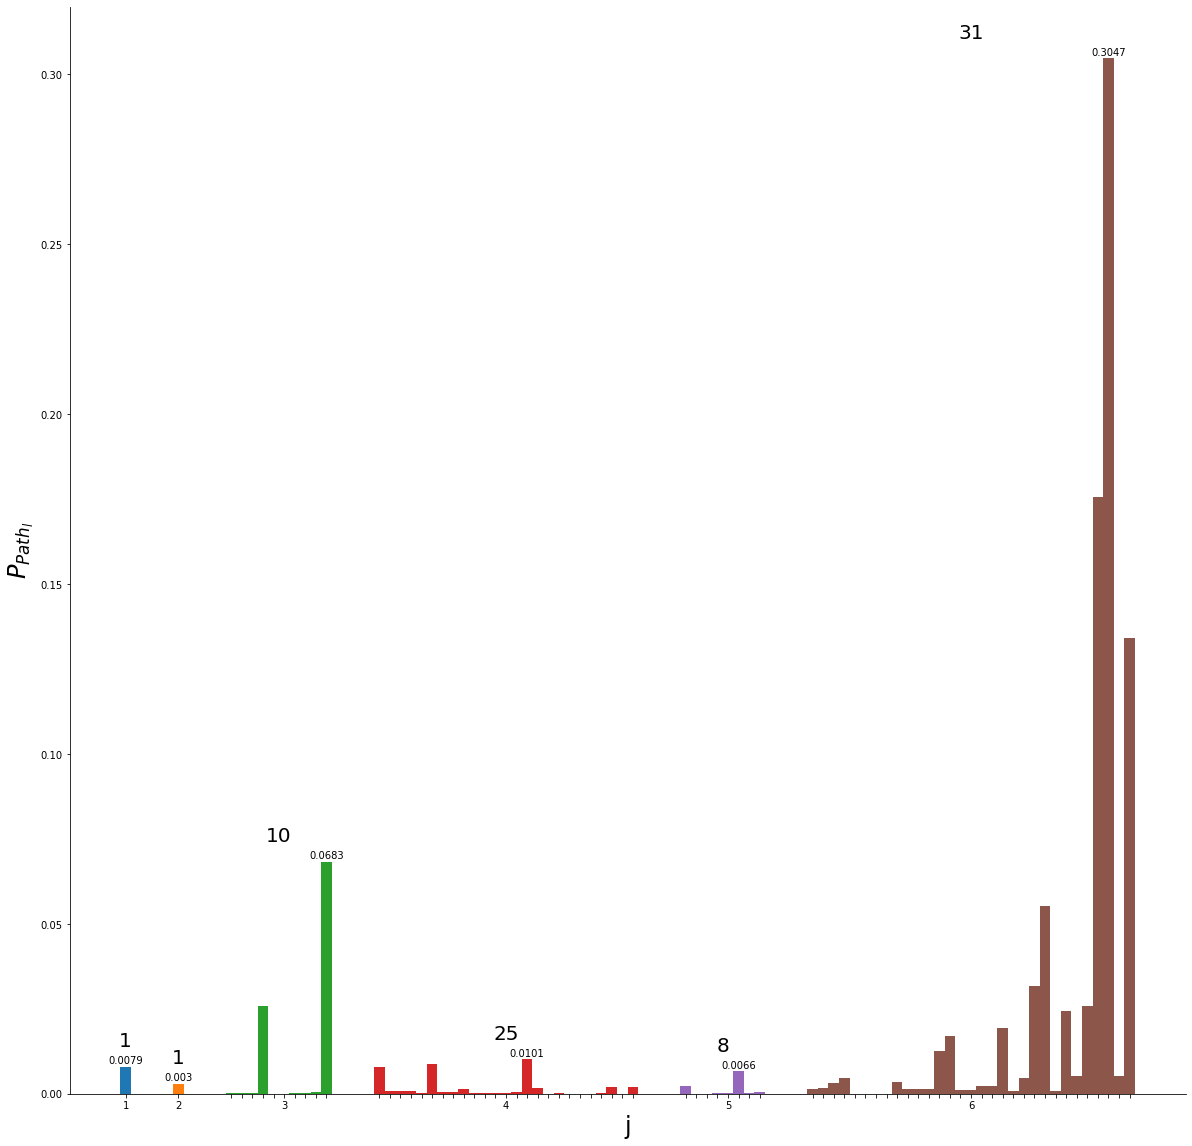

{'IS': {'layer': 6, 'cluster': [[8639231515.95696], [2195782082.245312], [1401679589.0, 1374690315.0], [1130712357.0, 1015193326.0, 950361769.0], [533259490.0, 484522620.0, 425422252.0, 415357538.0, 383459314.0, 304213468.0, 281181099.8299878, 269563371.0, 266429811.0, 156693384.0, 130414861.0], [90344582.0, 81610989.0, 81114769.0, 78437249.0, 59910690.0, 52973611.0, 51783319.0, 40892366.0, 36865560.0, 25155840.0, 17317342.0, 16401214.0, 11568056.0, 10935467.267612405, 8482128.0, 8170000.0, 6295567.0, 5337522.960134428, 4776001.0, 3035698.0, 2793549.0, 1170000.0, 923500.0, 559084.0, 401801.0, 330260.0, 252683.0, 250000.0, 197044.0, 191796.0, 138940.0, 132194.0, 118476.0, 112585.0, 96025.0, 95595.0, 92944.0, 40920.0, 34350.0, 33861.0, 33673.0, 31323, 30000.0, 25850.0, 25418.0, 23000.0, 22000, 19241.0, 9904.0, 8264.0, 5850.0, 2352.0, 2186.0, 2092.0, 1354.0, 1154.0, 1039.0, 1000.0, 750.0, 542.0, 457.0, 379.0, 286.0, 270.0, 155, 120.0, 95.0, 70.0, 64.0, 51.0, 32.0, 30.0, 29.0, 25, 25.0, 22

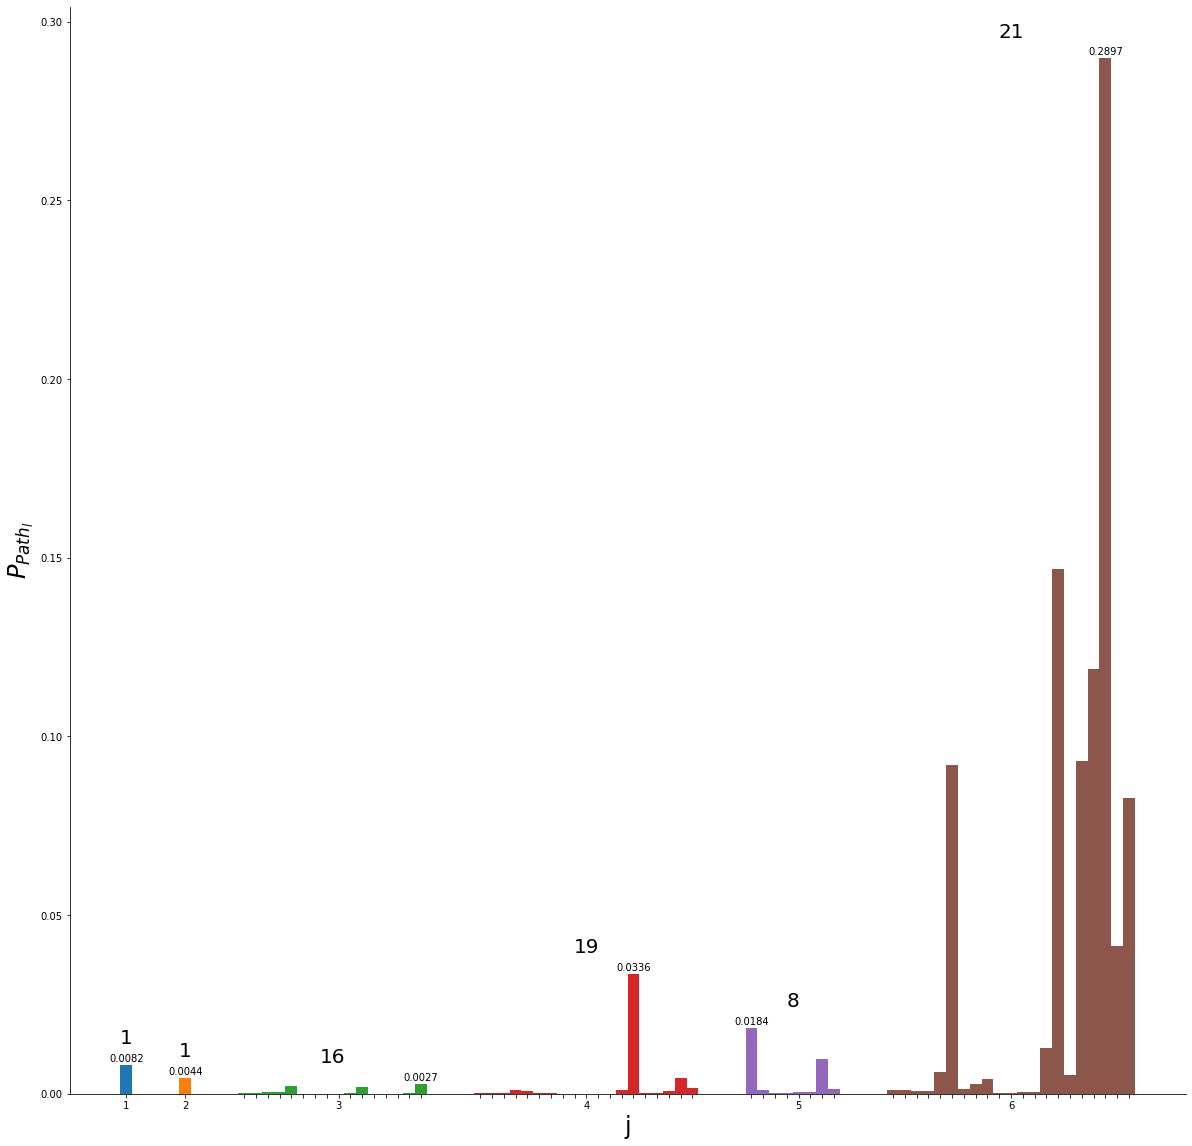

{'IS': {'layer': 6, 'cluster': [[10226624340], [2199760838], [1316015645, 1253237090, 1206561840], [1036787726, 931880948], [547990576, 375598592, 360939797, 316206649, 287663074], [203050477, 177482343, 169734174, 155963123, 151625902, 150070138, 84289328, 72395652, 69035632, 53196380, 51863913, 39313311, 38929767, 36049191, 31891638, 26935512, 21307045, 18356052, 15557177, 13432895, 12567122, 12059936, 12055950, 11010000, 10501455, 7074068, 7048038, 3829550, 1342354, 1091976, 768688, 567252, 530862, 437350, 327988, 280458, 189394, 178521, 152424, 130000, 115375, 94450, 84889, 67000, 62291, 57216, 48000, 35508, 34525, 26405, 24226, 21367, 20180, 19115, 11609, 11117, 10853, 9513, 4704, 2539, 1580, 1576, 1562, 1372, 1305, 1284, 1001, 779, 590, 428, 350, 300, 209, 192, 178, 150, 120, 95, 27, 25, 25, 25, 24, 10, 10, 10, 9, 8, 7, 2, 2, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'p': [0.00819672131147541, 0.00819672131147541, 0.02459016393442623, 0.01639344262295082, 0.04098

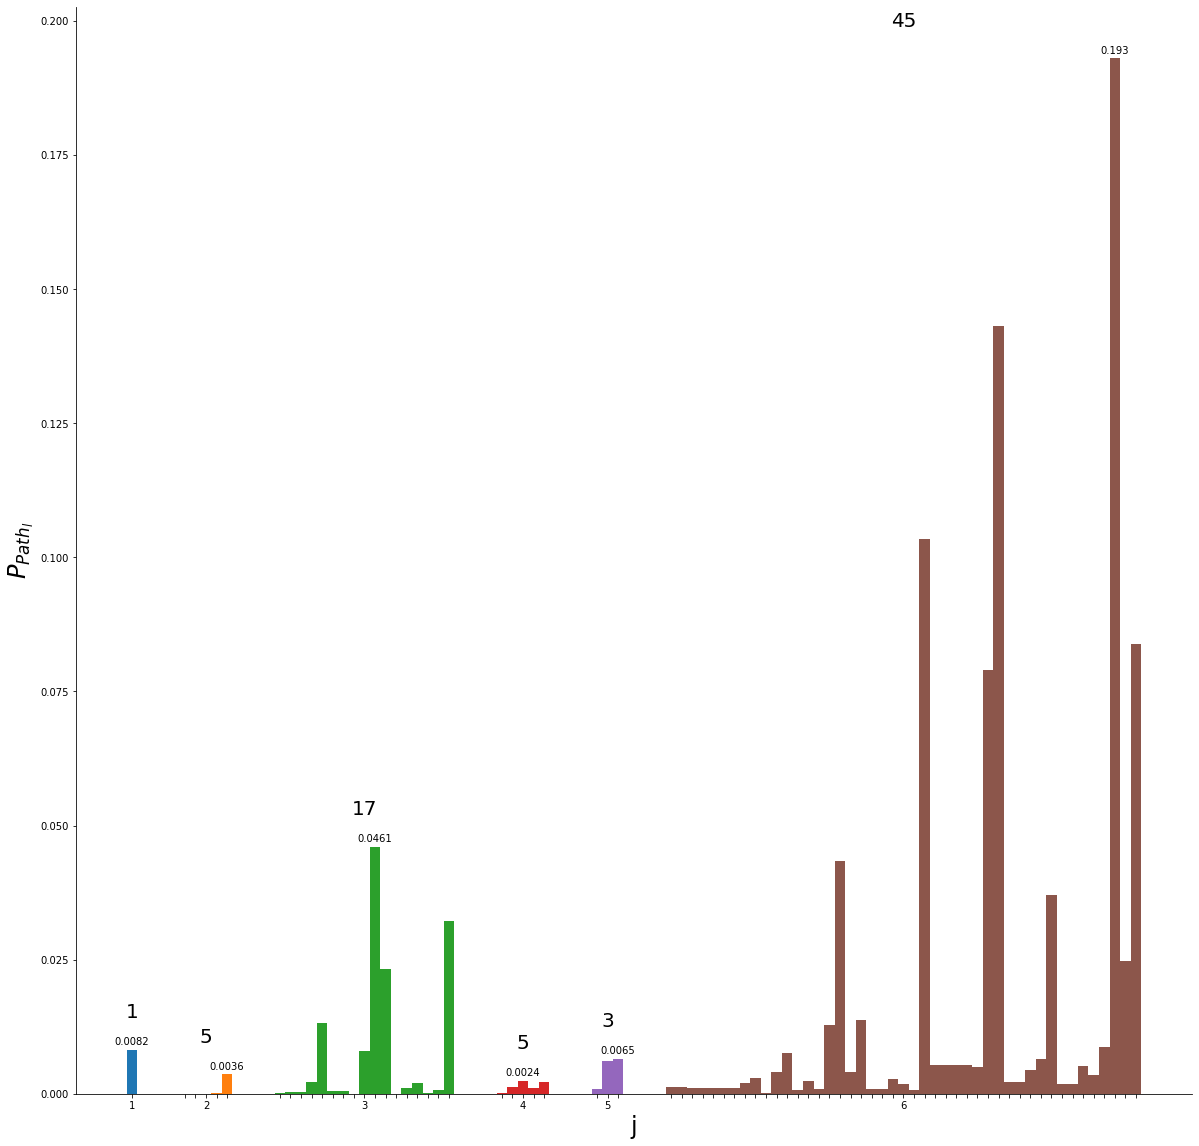

{'IS': {'layer': 6, 'cluster': [[11742200360], [1886889494], [1456719877, 1346058093], [1166323107, 1044197191, 975636505], [427360162, 389776869, 340116695, 303554919, 276955670, 220862048, 218470924, 184558632, 177310053, 171608668, 169194991, 145901466], [102584527, 88270651, 84083490, 73014151, 70620488, 56714295, 55283536, 30313998, 26049792, 25865687, 22229848, 16086447, 13592384, 11856100, 11576793, 10454099, 8879739, 8468756, 6705740, 4891758, 4521660, 3195150, 1083954, 888768, 775941, 540352, 432298, 401815, 289350, 255302, 241917, 205106, 172514, 137159, 117843, 90172, 53740, 51112, 40447, 33179, 27264, 26618, 24000, 23528, 22585, 22337, 18209, 15126, 13008, 6743, 4551, 4094, 4000, 3152, 3126, 2982, 2815, 2480, 2170, 1965, 1963, 1960, 1853, 1079, 1013, 929, 668, 506, 296, 208, 161, 145, 108, 80, 80, 71, 64, 60, 51, 46, 40, 36, 30, 27, 25, 25, 24, 24, 22, 20, 20, 19, 19, 18, 15, 12, 12, 11, 11, 10, 9, 9, 8, 8, 7, 6, 6, 6, 5, 5, 5, 4, 4, 3, 3, 3, 3, 2, 2, 2, 2, 1, 1, 1, 0, 0, 0

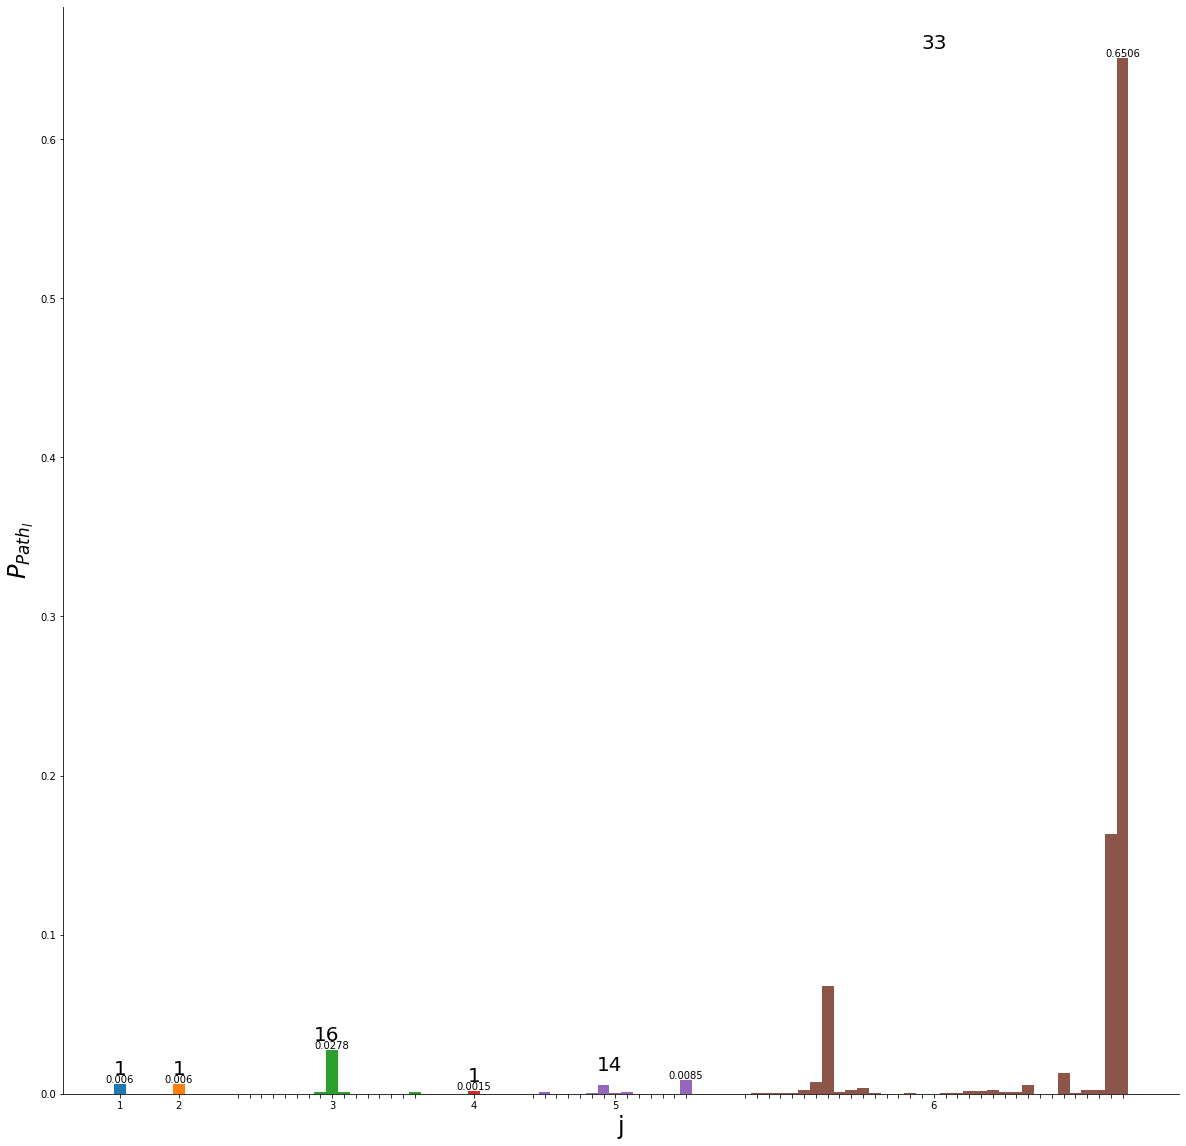

{'IS': {'layer': 6, 'cluster': [[15027554404.0], [4106655415.0], [1442281223.679997, 1372960638.0, 1263734452.0, 1077787462.0], [731553230.0], [519917677.0, 451451379.0, 430592865.0, 390295954.0, 385077853.0], [259084600.0, 214395320.0, 175392630.0, 160625967.0, 146838206.0, 137141278.0, 129451088.41466442, 118488823.0, 82244990.0, 72339500.0, 53727237.0, 49229225.0, 45535061.0, 45382316.0, 42025391.0, 39417975.0, 34210969.0, 24839409.0, 23440232.0, 15583339.0, 15552569.0, 10334363.0, 9363152.0, 8908301.36865716, 7136433.0, 6101300.0, 5882400.0, 1980000.0, 1378435.0, 670416.0, 624180.0, 610135.0, 502749.0, 461577.0, 209559.79720854922, 195000.0, 171830.0, 154127.0, 134818.0, 117044.0, 101193.0, 88966.0, 87000.0, 50782.0, 37343.0, 25781.0, 23300, 14412, 8400.0, 8135.0, 5768.0, 5500.0, 4320.0, 3085.0, 2460, 2388, 2159.0, 1266.0, 1203.0, 1013.0, 960.0, 948.0, 722.0, 501.0, 310.0, 267.0, 95, 54.0, 49.0, 34.0, 30.0, 22.0, 20.0, 19.0, 6.0, 2.0, 1.0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

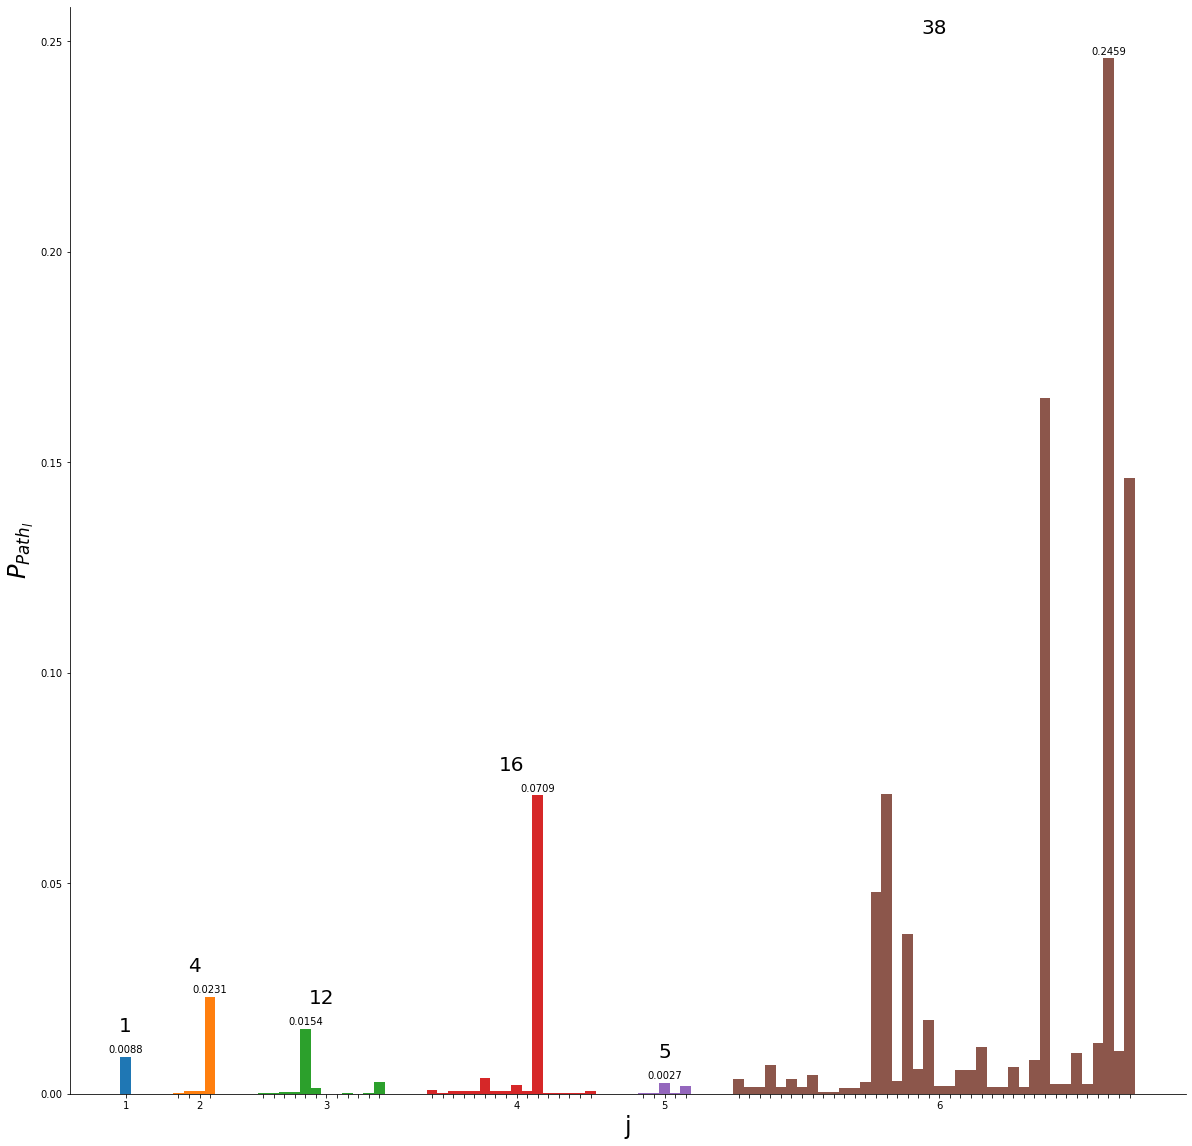

{'IS': {'layer': 6, 'cluster': [[15600100503], [3700248900], [1628721280, 1568617742, 1516836485, 1477439997], [828249572, 751087604], [491053184, 467939280, 437897160, 382620844], [224278829, 210743692, 207304400, 202564237, 188960555, 160774909, 138140584, 131280528, 120067892, 95830904, 84768018, 48755943, 47210621, 45527436, 44383044, 30765226, 30042971, 23916861, 23794061, 21303463, 19230125, 17551605, 14260498, 13090759, 10045918, 8083754, 5089684, 4188660, 2729925, 2528987, 1088817, 558926, 336522, 284000, 127269, 114177, 101150, 73834, 62528, 60545, 56800, 50488, 45771, 41510, 18500, 13500, 13070, 10000, 9183, 5584, 5025, 3084, 2523, 2512, 1578, 1221, 1019, 1010, 750, 636, 500, 499, 355, 350, 298, 265, 228, 195, 176, 174, 133, 103, 78, 70, 53, 36, 25, 20, 15, 10, 6, 5, 5, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'p': [0.007874015748031496, 0.007874015748031496, 0.031496062992125984, 0.015748031496062992, 0.031496062992125

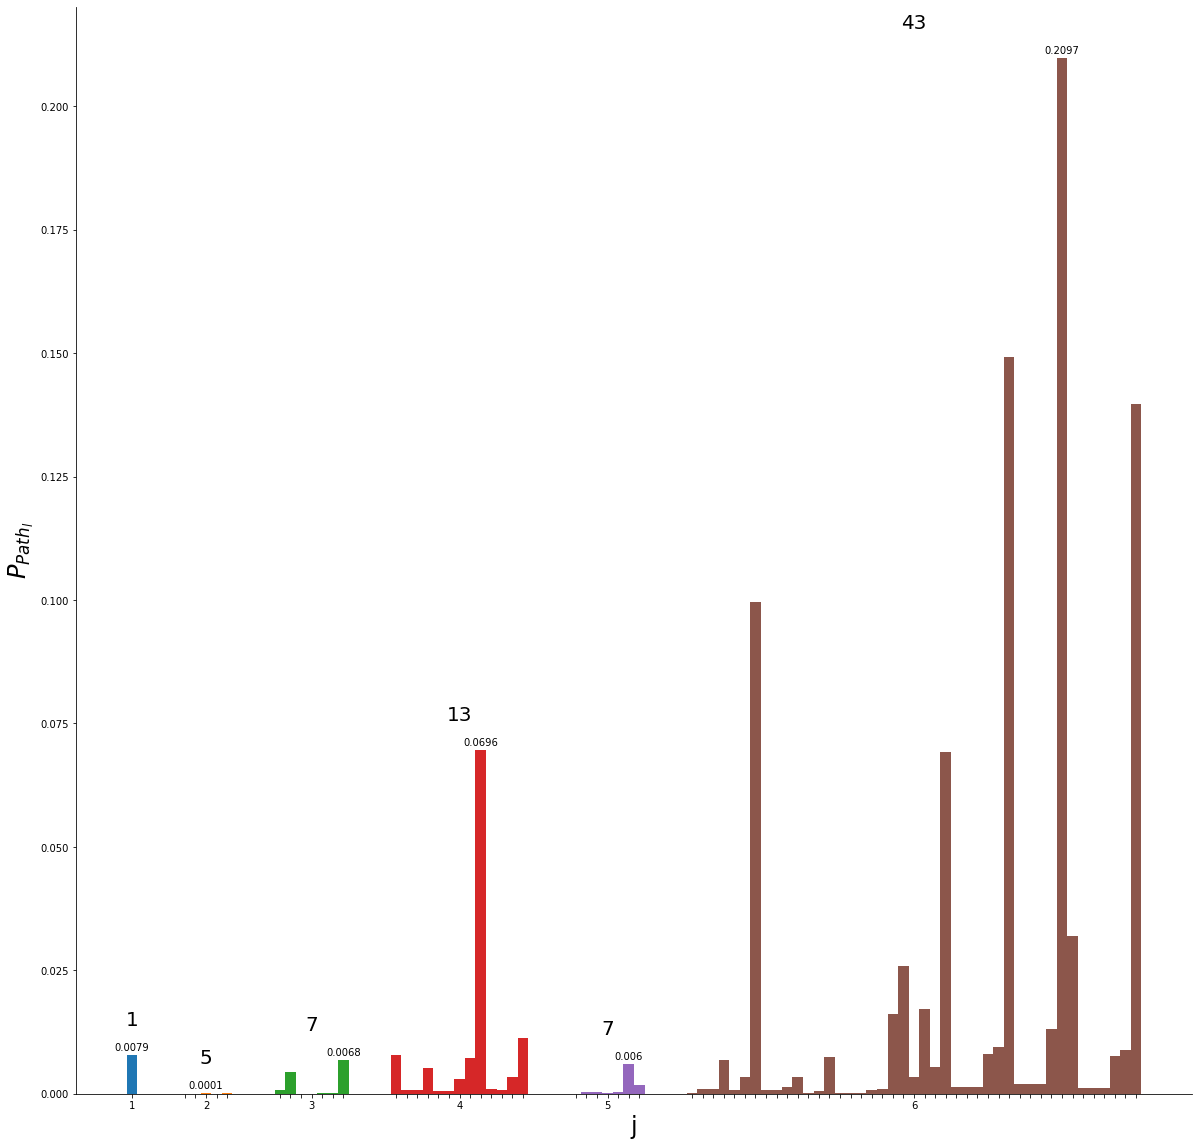

{'IS': {'layer': 6, 'cluster': [[17622532712], [4095263145], [1653381476, 1515352435, 1509688125], [983591787], [694947921, 588288520, 558628932, 352878705, 331224424, 325240925], [259794575, 233751193, 208028360, 182482260, 132748585, 128014853, 117977694, 102837090, 87654214, 67254988, 66251616, 61302745, 56554396, 49832404, 45182327, 44269028, 41436500, 28074894, 27551778, 23127860, 13833893, 9868943, 9776665, 8381428, 5625112, 5139361, 4508505, 3898104, 3695889, 3526137, 2361776, 1751461, 466128, 342811, 300212, 249251, 201522, 171500, 156901, 156010, 76638, 72650, 61199, 60219, 41303, 36013, 27147, 24684, 24381, 13000, 12042, 10594, 10587, 10035, 9662, 5182, 4075, 3496, 3044, 2763, 2600, 2353, 1714, 1268, 1151, 1050, 1000, 963, 864, 750, 705, 650, 501, 331, 301, 290, 200, 147, 95, 88, 80, 53, 51, 25, 20, 20, 9, 6, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'p': [0.008130081300813009, 0.008130081300813009, 0.024390243902439025, 0.008130081300813009, 0.04

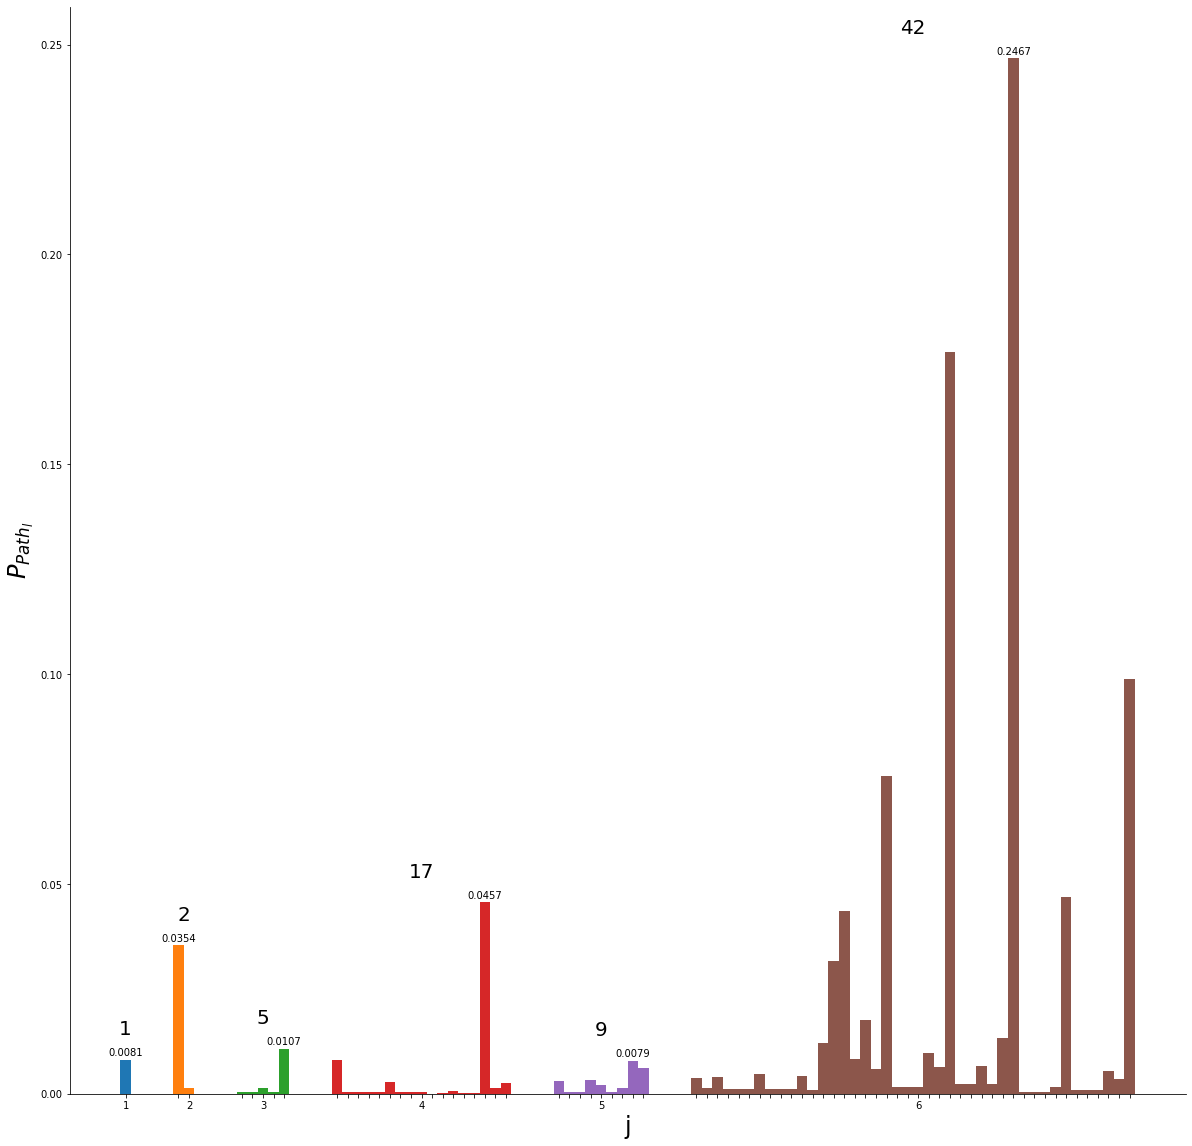

{'IS': {'layer': 6, 'cluster': [[19119773815], [3538318614], [1534672500], [1161838227, 1034233018], [731263220, 665027485], [450597508, 434710578, 354453842, 338990526, 323785886, 276996265, 249805782, 241323412, 210146190, 205955369, 193987600, 182427694, 159766680, 144560690, 141903894, 80819604, 67328863, 56872170, 28229333, 28191639, 27913313, 20604232, 11647310, 10401924, 7656959, 6776216, 6033452, 5650560, 3438679, 2744109, 2575933, 2273610, 2114024, 1947714, 1239051, 590914, 426406, 369499, 289634, 275105, 180000, 126944, 121531, 105335, 100000, 92922, 73628, 58249, 54393, 41749, 34676, 32933, 22001, 20000, 18059, 10769, 10000, 10000, 3648, 3375, 2462, 2183, 2083, 2000, 1358, 1194, 1000, 962, 855, 682, 400, 108, 81, 50, 20, 13, 10, 8, 8, 5, 5, 4, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'p': [0.008771929824561403, 0.008771929824561403, 0.008771929824561403, 0.017543859649122806, 0.017543859649122806, 0.9385964912280702]}, 'OS': {'layer': 6, '

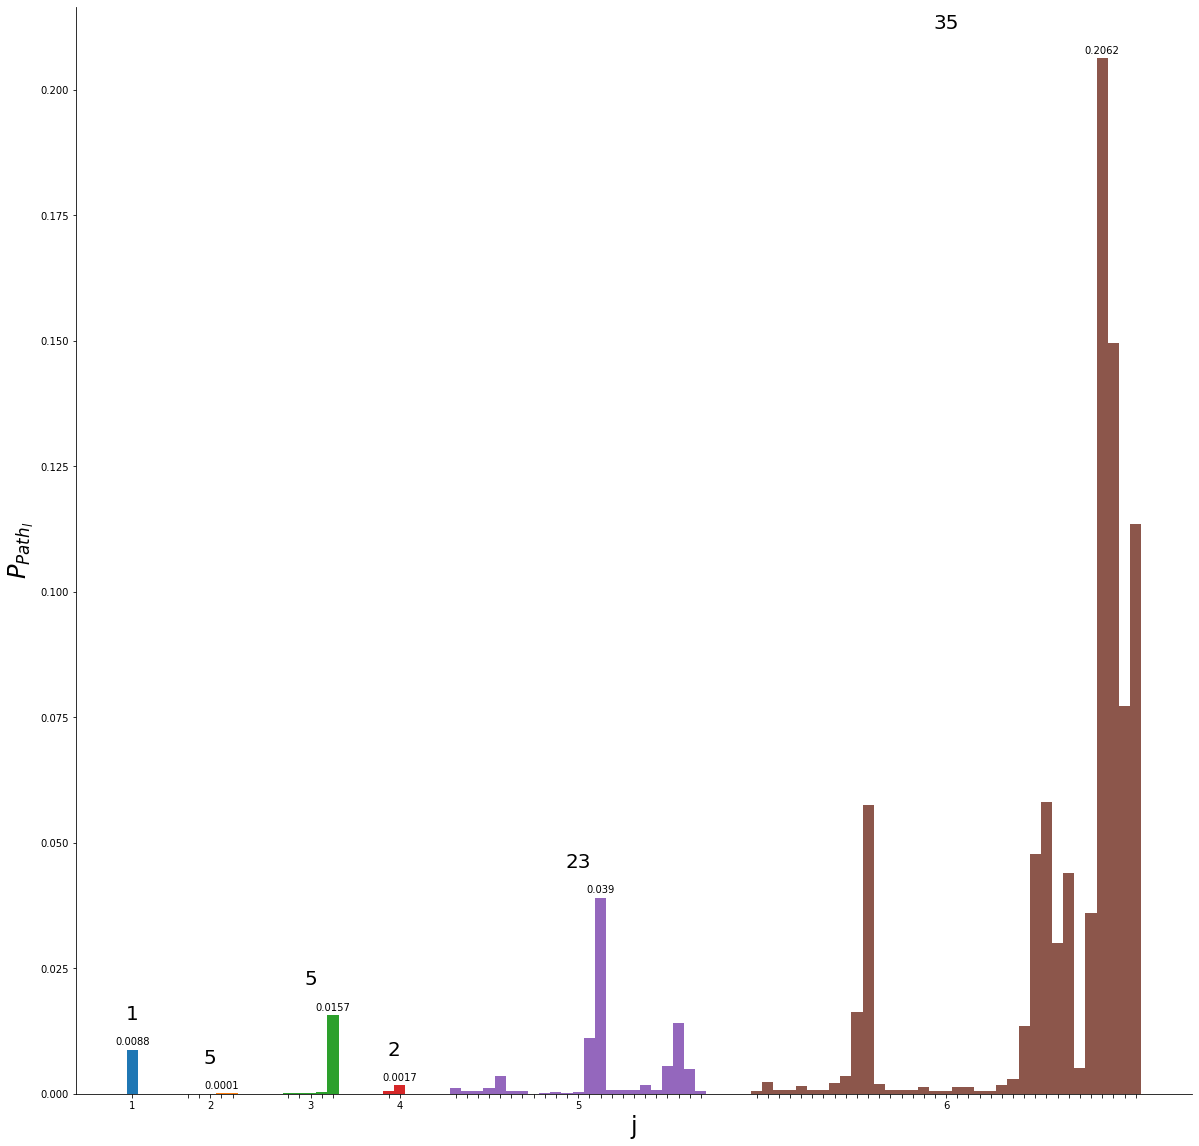

{'IS': {'layer': 6, 'cluster': [[21271780904], [4727510512], [1951877486], [1247162950, 1136496170], [596736858, 464042817, 459622166, 446013597, 395756732, 301573455, 269731515, 246195294, 234859136], [187306476, 177058940, 164597271, 129094511, 114061791, 108954905, 84135902, 64103356, 41255026, 30300920, 30186023, 18360643, 16563530, 14207578, 6751014, 6694131, 5856675, 4611417, 4017872, 3785267, 3568599, 637605, 479965, 301769, 281812, 242296, 161006, 109973, 70611, 51819, 50826, 40140, 39184, 24276, 20737, 20000, 19944, 17000, 9910, 9220, 8565, 8023, 7037, 6203, 5492, 4000, 2866, 2430, 2197, 1762, 1214, 1126, 830, 800, 637, 253, 253, 200, 153, 126, 81, 65, 26, 12, 7, 6, 4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'p': [0.00909090909090909, 0.00909090909090909, 0.00909090909090909, 0.01818181818181818, 0.08181818181818182, 0.8727272727272727]}, 'OS': {'layer': 6, 'cluster': [[11850717629], [6458378337], [1822703892], [1471457308, 1459

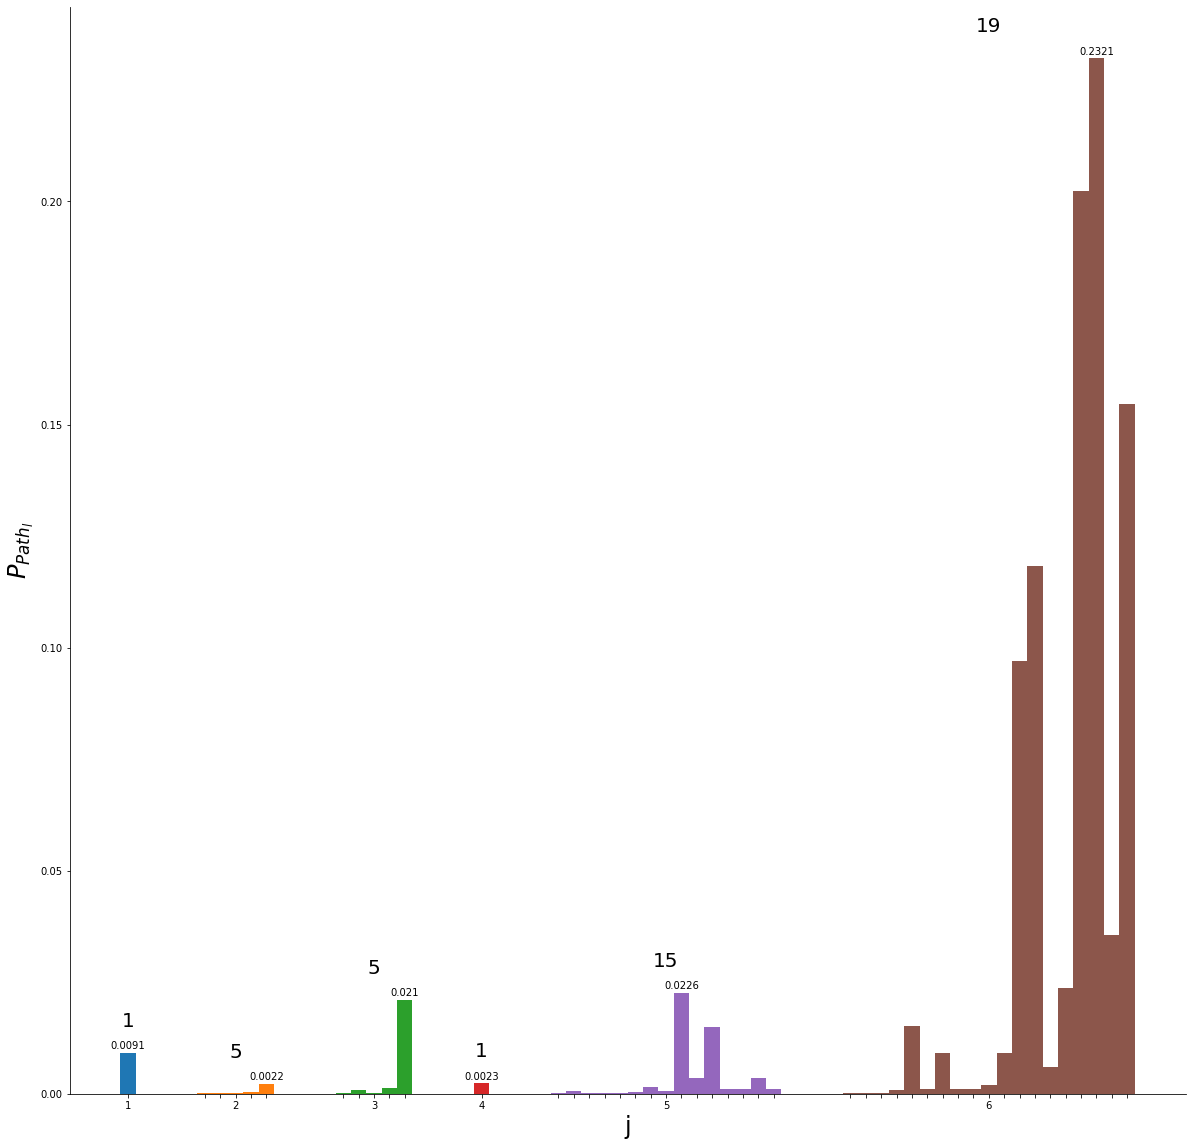

In [38]:
for report in reports:
    report.decision_probability_bar()


以第一个图为例，使用柱状图的形式展示了 86 条决策规则的概率值，并且按照决策规则的最终决策属性的取值进行了分区. 例如，决策结果为 1 的决策规则只有 1 条，其概率约为 $0.008403$，即图中从左数第一根柱形图.

3. 节点脆弱性风险

节点脆弱性在对应离散分区下的层次风险：

$$
  P_j = \sum_{l=1}^MP_{\text{Rule}l}(j_{A_n})
$$

$P_j$ 表示了对于任意节点，通过决策树，做出决策属性为 $j$ 的概率，即各个决策属性为 $j$ 的决策规则的概率求和.
  

In [39]:
for report in reports:
    report.get_hierarchical_risk()
    print(report.name + '年层次风险分布')
    report.hierarchical_risk_bar()


AttributeError: 'Report' object has no attribute 'get_hierarchical_risk'

上图展示了各个决策属性的概率分布，其中决策属性为 $1,2,3$ 的概率值较小，决策属性为 $4,5,6$ 的概率较大，决策属性为 $6$ 的概率尤其大.

In [ ]:
import numpy as np

xs = np.arange(10) + 1 + 2
xs = [[1, 2], [2, 3]]


In [ ]:
[x for j in xs for x in j]


In [ ]:
[x for j in xs for x in j]


In [ ]:
res = []
for j in xs:
    for x in j:
        res.append(x)

res


In [ ]:
ps = [[0.008264462809917356], [0.008264462809917356], [2.4986135284033322e-05, 0.0001249306764201666, 0.0007745701938050329, 7.495840585209997e-05, 0.0006496395173848664], [0.0024588484393142547, 2.201448327209732e-05, 0.0001100724163604866, 0.0006824489814350169, 6.604344981629197e-05, 0.0005723765650745303], [0.00020490403660952122, 0.00020490403660952122, 0.0006147121098285637, 0.00020490403660952122, 0.021105115770780686, 0.0008879174919745919, 0.0008879174919745919, 0.0012107965799653525, 0.0008879174919745919,
                                                                                                                                                                                                                                                                                                                         0.010655009903695103, 0.000755830592342008, 0.001511661184684016, 0.000755830592342008, 0.0001561633455252083, 0.0001561633455252083, 0.0003123266910504166, 0.0001561633455252083, 0.0007808167276260414, 0.06651309212609671, 0.020490403660952124], [0.0013742374406218326, 0.01733413135329812, 0.23140495867768596, 0.005122600915238031, 0.010245201830476062, 0.005122600915238031, 0.12806502288095076, 0.0037255279383549313, 0.018627639691774656, 0.20490403660952122, 0.11549136608900286, 0.011176583815064794, 0.09686372639722822]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
plt.figure(figsize=(10, 8))

width = 1
group_gap = 5

# fig, ax = plt.subplots()

last_index = 0
ind = []
xs = []

for i in range(0, 6):
    group_len = len(ps[i])

    x = np.arange(group_len) + last_index + group_gap
    xs.append(x)

    last_index = x[-1]

    plt.bar(x, ps[i], width)


ind = [x for j in xs for x in j]

x_labels = ['' for _ in range(len(ind))]

former_index = 0
for i, x in enumerate(xs):
    x_labels[former_index + int(len(x) / 2)] = i + 1
    former_index += len(x)

# plt.xticklabels(x_labels, fontsize=14)

plt.ylabel(r"$P_{Path_l}$", fontsize=20)
# plt.xticks(ind, [i + 1 for i in range(len(xs))])
plt.xticks(ind, x_labels)

print(ind, x_labels)

plt.show()


In [ ]:
a = -1
b = 2
abs(a)


In [ ]:
import numpy as np
print(np.arange(1, 20, 2))
